# Bike Sharing Assignment

### Business Objectives

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

The model will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing the required libraries & Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#changing the display options for rows and columns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',200)

# 1. Reading, Understanding and Visualizing the data

## 1.1 Importing datasets

#### Reading the data in dataframe 'bikes'

In [3]:
bikes = pd.read_csv("day.csv")

## 1.2 Data understanding

In [4]:
#checking the top 5 rows of the dataframe 

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Dropping columns not required
# Dropping column "instant" from the dataframe as the record index has unique value for each row, therefore not required
# Dropping the date column as the information already captured in separate month/year and weekday/workingday columns
# Dropping the "casual" and "registered" columns,as we are considering the "cnt" column as the taget variable.
# The 'cnt' variable indicates the total number of bike rentals, including both casual and registered.

columns_to_drop = ["instant","dteday","casual","registered"]
bikes = bikes.drop(columns_to_drop, axis =1)

In [6]:
#checking the info for dataframe

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**Observation:** No null values in any column, the datatypes of all columns are numeric

In [7]:
#Statistical description of the dataframe
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [8]:
#Checking the number of rows and columns in the dataframe
bikes.shape

(730, 12)

## 1.3 EDA & Data Visualization

We use data visualization to understand our data better.

### Checking the distribution of the target variable "cnt"

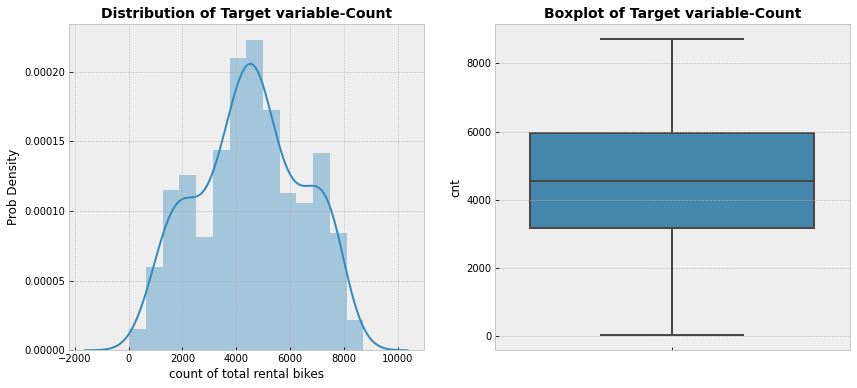

In [9]:
plt.figure(figsize=(14,6))
plt.style.use('bmh')

plt.subplot(1,2,1)
sns.distplot(bikes["cnt"])
plt.title("Distribution of Target variable-Count", fontsize = 14, fontweight="bold")
plt.xlabel('count of total rental bikes')
plt.ylabel('Prob Density')

plt.subplot(1,2,2)
sns.boxplot(y=bikes["cnt"])
plt.title("Boxplot of Target variable-Count", fontsize = 14, fontweight="bold")

plt.show;

### Checking the relationship of the target variable "cnt" with other numeric variables

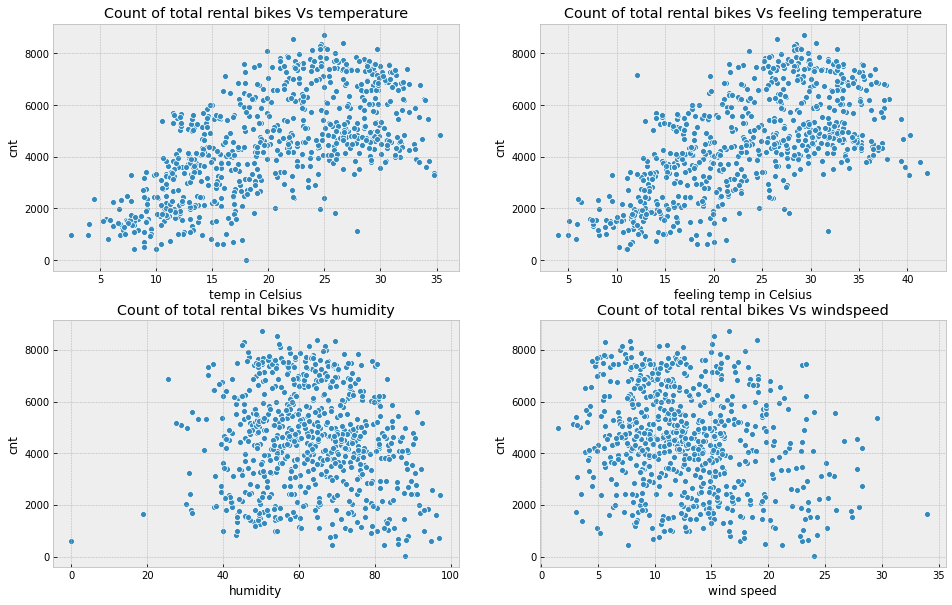

In [10]:
plt.figure(figsize=(16,10))
    
plt.subplot(2,2,1)
sns.scatterplot('temp','cnt', data = bikes)
plt.title("Count of total rental bikes Vs temperature")
plt.xlabel("temp in Celsius")

plt.subplot(2,2,2)
sns.scatterplot('atemp','cnt', data = bikes)
plt.title("Count of total rental bikes Vs feeling temperature")
plt.xlabel("feeling temp in Celsius")

plt.subplot(2,2,3)
sns.scatterplot('hum','cnt', data = bikes)
plt.title("Count of total rental bikes Vs humidity")
plt.xlabel("humidity")

plt.subplot(2,2,4)
sns.scatterplot('windspeed','cnt', data = bikes)
plt.title("Count of total rental bikes Vs windspeed")
plt.xlabel("wind speed")

plt.show();

**Observation:** 

- The target variable "cnt" is observed to have approximately linear relationships with positive correlation with "temp" and "atemp" variables.

### Checking for multicollinearity: correlation between different numeric variables

In [11]:
#selecting the numerical columns to find pairwise correlation
bikes_num = bikes[['cnt','temp','atemp','hum','windspeed']]

In [12]:
bikes_num.corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


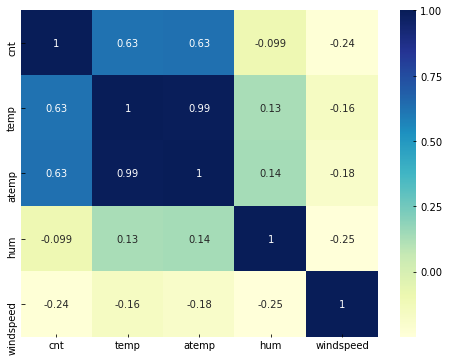

In [13]:
#plotting heatmap to observe correlation

plt.figure(figsize = (8,6))
sns.heatmap(bikes_num.corr(), annot = True, cmap="YlGnBu")
plt.show;

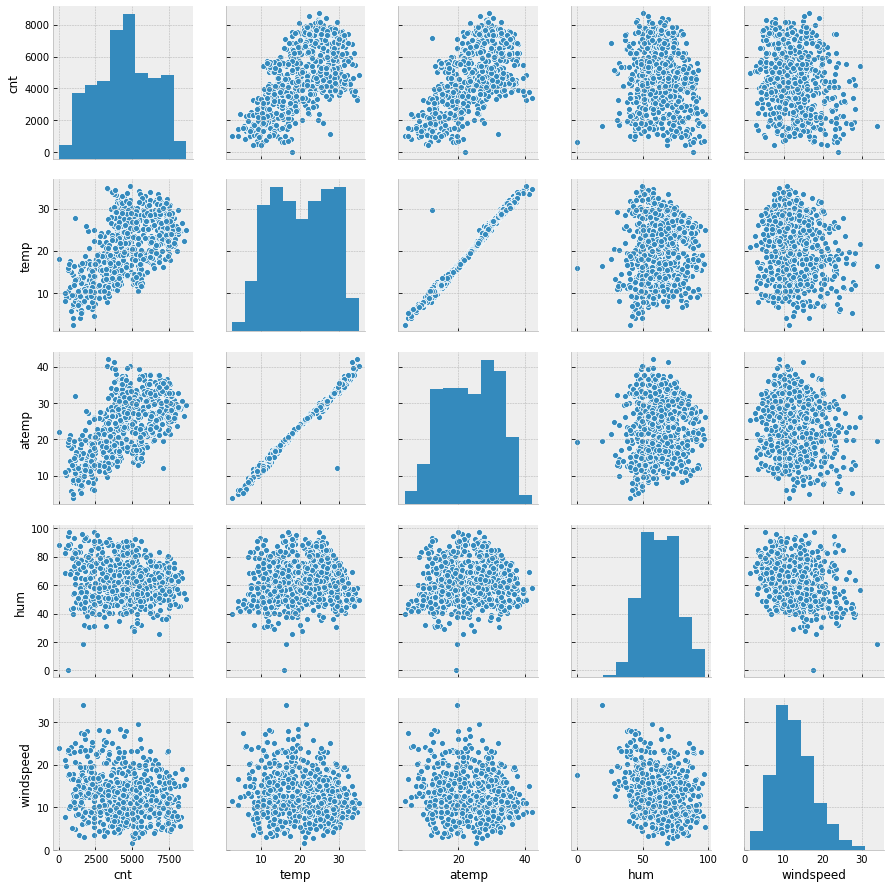

In [14]:
#plotting pairplot to observe pair-wise correlation between different numeric variables
sns.pairplot(bikes_num)
plt.show;

**Observation:**

1. Variables "temp" and "atemp" have high correlation, hence we can drop one of them while building our model.

#### Dropping "atemp" variable from the dataset

In [15]:
# Dropping column "atemp" due to its high correlation with "temp" column, to avoid multicollinearity
bikes = bikes.drop(["atemp"], axis =1)

### Checking the relationship of the target variable "cnt" with categorical variables

### Converting the feature values into categorical string values

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
# Map the feature values to the category names
bikes[['season']] = bikes[['season']].apply(lambda x: x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))
bikes[['mnth']] = bikes[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))
bikes[['weekday']] = bikes[['weekday']].apply(lambda x: x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))
bikes[['weathersit']] = bikes[['weathersit']].apply(lambda x: x.map({1:'Clear/Partly cloudy',2:'Mist/ Mist+Cloudy',3:'Light rain/snow',4:'Heavy rain/snow'}))

In [17]:
# Convert the datatypes from int to categorical for columns season, mnth, weekday,weathersit
category_columns = ["season","mnth","weekday","weathersit"]
bikes[category_columns] = bikes[category_columns].astype('category')

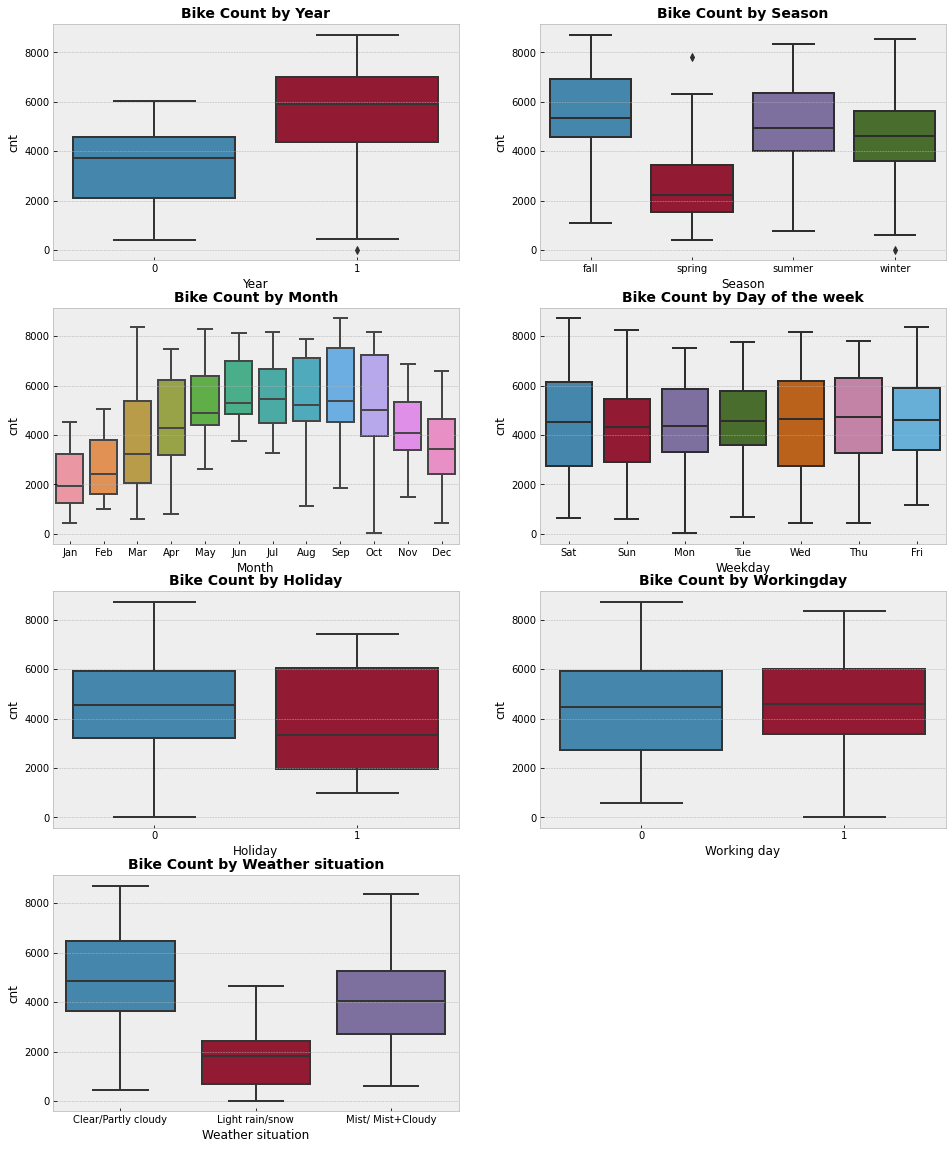

In [18]:
#Box plots of Categorical variables

plt.figure(figsize=(16,20))

plt.subplot(4,2,1)
sns.boxplot(x='yr',y='cnt', data = bikes)
plt.xlabel("Year")
plt.title("Bike Count by Year",fontsize=14, fontweight="bold")

plt.subplot(4,2,2)
sns.boxplot(x='season',y='cnt', data = bikes)
plt.xlabel("Season")
plt.title("Bike Count by Season",fontsize=14, fontweight="bold")

plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt', data = bikes, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.title("Bike Count by Month",fontsize=14, fontweight="bold")

plt.subplot(4,2,4)
sns.boxplot(x='weekday',y='cnt', data = bikes, order=['Sat','Sun','Mon','Tue','Wed','Thu','Fri'])
plt.xlabel("Weekday")
plt.title("Bike Count by Day of the week",fontsize=14, fontweight="bold")

plt.subplot(4,2,5)
sns.boxplot(x='holiday',y='cnt', data = bikes)
plt.xlabel("Holiday")
plt.title("Bike Count by Holiday",fontsize=14, fontweight="bold")

plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt', data = bikes)
plt.xlabel("Working day")
plt.title("Bike Count by Workingday",fontsize=14, fontweight="bold")

plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt', data = bikes)
plt.xlabel("Weather situation")
plt.title("Bike Count by Weather situation",fontsize=14, fontweight="bold")

plt.show();

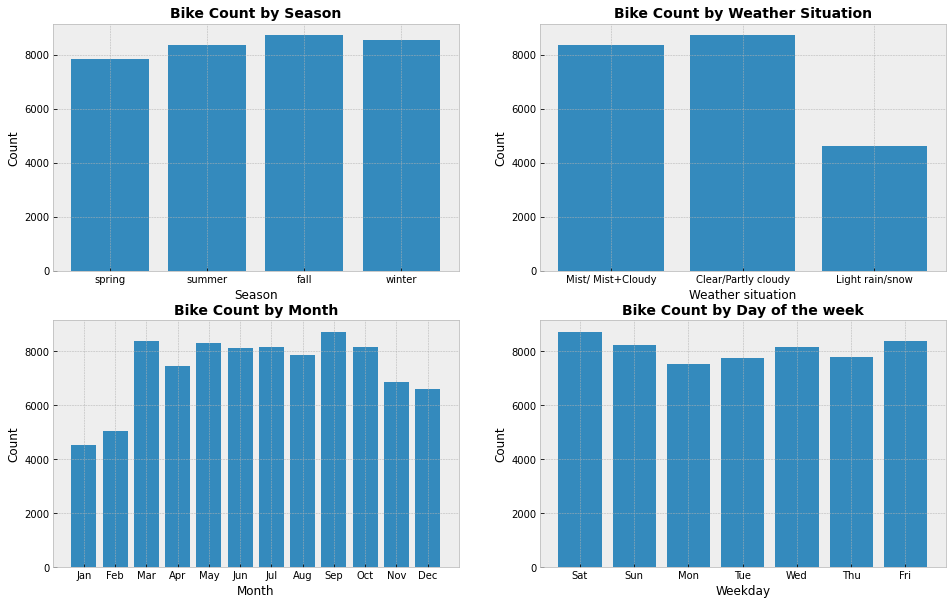

In [19]:
#Distribution plots of Categorical variables

plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.bar(bikes["season"], bikes["cnt"])
plt.xlabel("Season")
plt.ylabel('Count')
plt.title("Bike Count by Season",fontsize=14, fontweight="bold")

plt.subplot(2,2,2)
plt.bar(bikes["weathersit"], bikes["cnt"])
plt.xlabel("Weather situation")
plt.ylabel('Count')
plt.title("Bike Count by Weather Situation",fontsize=14, fontweight="bold")

plt.subplot(2,2,3)
plt.bar(bikes["mnth"], bikes["cnt"])
plt.xlabel("Month")
plt.ylabel('Count')
plt.title("Bike Count by Month",fontsize=14, fontweight="bold")

plt.subplot(2,2,4)
plt.bar(bikes["weekday"], bikes["cnt"])
plt.xlabel("Weekday")
plt.ylabel('Count')
plt.title("Bike Count by Day of the week",fontsize=14, fontweight="bold")


plt.show();

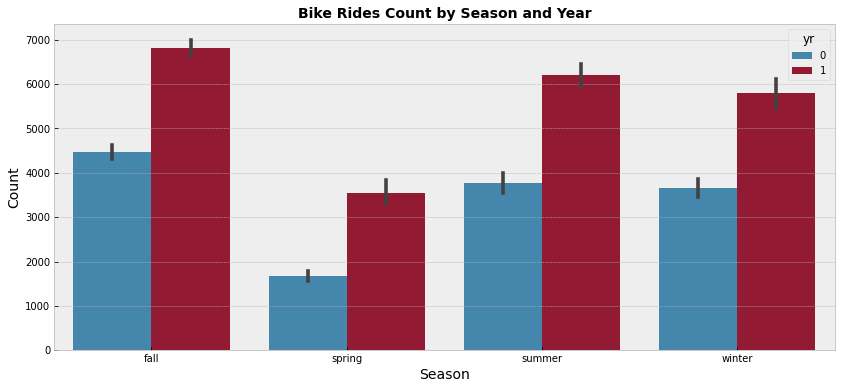

In [20]:
#Distribution of count of bike rides by year and season
plt.figure(figsize = (14,6))
sns.barplot(data = bikes, x = 'season', y = "cnt", hue = 'yr')
plt.ylabel('Count',fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.title('Bike Rides Count by Season and Year',fontsize=14, fontweight="bold")
plt.show();

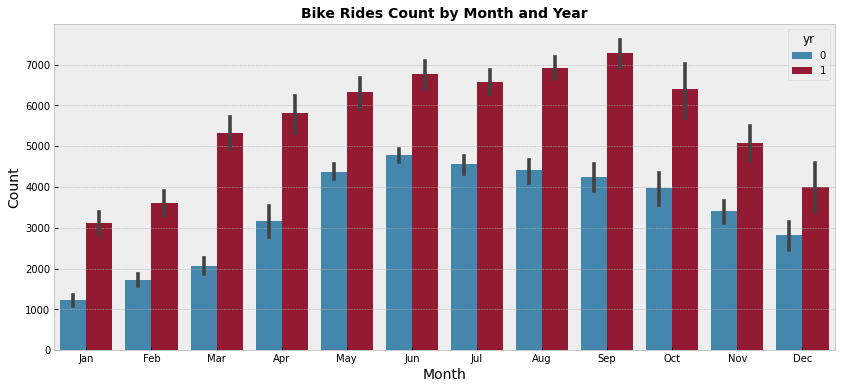

In [21]:
#Distribution of count of bike rides by year and month
plt.figure(figsize = (14,6))
sns.barplot(data = bikes, x = 'mnth', y = "cnt", hue = 'yr', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Count',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.title('Bike Rides Count by Month and Year',fontsize=14, fontweight="bold")
plt.show();

**Observation:**

- Higher cnt in year 2019 compared to 2018

- Among the seasons, higher cnt during fall, lowest in spring. 

- The variation across months is observed. Sep has the highest demand and Jan has the lowest demand.

- Clear/partly cloudy weathersit has highest count, whereas count decreases for Light rain/snow. No count for high rain/snow.

- Not much difference between weekdays and weekends.


# 2. Data Preparation

In [22]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist/ Mist+Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist/ Mist+Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear/Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear/Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear/Partly cloudy,9.305237,43.6957,12.522300,1600


## 2.1 Creating Dummy variables for the categorical variables

In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [24]:
# Creating dummy variables for the Categorical columns "season", "month","weekday","weathersit", to convert categorical data to numerical
bikes_season = pd.get_dummies(bikes["season"], drop_first = True)
bikes_month = pd.get_dummies(bikes["mnth"], drop_first = True)
bikes_weekday = pd.get_dummies(bikes["weekday"], drop_first = True)
bikes_weathersit = pd.get_dummies(bikes["weathersit"], drop_first = True)

In [25]:
#Checking the dummy variables created for season
bikes_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
#Checking the dummy variables created for month
bikes_month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
#Checking the dummy variables created for weekday
bikes_weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
#Checking the dummy variables created for weathersit
bikes_weathersit.head()

,Light rain/snow,Mist/ Mist+Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [29]:
# Concat the dataframes with the dummy variables
bikes = pd.concat([bikes, bikes_season, bikes_month, bikes_weekday, bikes_weathersit], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
0,spring,0,Jan,0,Sat,0,Mist/ Mist+Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist/ Mist+Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear/Partly cloudy,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear/Partly cloudy,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear/Partly cloudy,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Drop the variables no longer required, as dummy variables have already been created for them

columns_to_drop = ["season","mnth","weekday","weathersit"]
bikes = bikes.drop(columns_to_drop, axis =1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
#Checking the columns of the final dataframe
print(bikes.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', 'Light rain/snow', 'Mist/ Mist+Cloudy'],
      dtype='object')


## 2.2 Train-Test Split

In [32]:
#Dividing the dataset into train and test sets in the ratio 70:30
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state = 2)

In [33]:
#checking the dimensions
print(bikes.shape)
print(bikes_train.shape)
print(bikes_test.shape)

(730, 29)
(510, 29)
(220, 29)


## 2.3 Re-scaling of variables: Min-Max Scaling

In [34]:
#scaling the numeric variables using min-max scaler so that all variables have a comparable scale.
scaler = MinMaxScaler()
num_variables = ['temp', 'hum', 'windspeed', 'cnt']
bikes_train[num_variables] = scaler.fit_transform(bikes_train[num_variables])
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
573,1,0,0,0.868126,0.549219,0.278224,0.766567,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
267,0,0,0,0.716524,0.848305,0.057698,0.573861,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
551,1,0,1,0.958464,0.339429,0.255118,0.711574,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,0,0,1,0.778826,0.753631,0.388482,0.404970,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
370,1,0,1,0.342709,0.457234,0.299990,0.468937,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
bikes_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.503922,0.500476,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.031373,0.174494,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.672549,0.469744,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.539576,0.230720,0.0,0.339074,0.531173,0.743261,1.0
hum,510.0,0.569490,0.181966,0.0,0.426638,0.571812,0.699300,1.0
windspeed,510.0,0.346355,0.158454,0.0,0.234958,0.329488,0.430793,1.0
cnt,510.0,0.511147,0.224394,0.0,0.344052,0.516337,0.691584,1.0
spring,510.0,0.258824,0.438419,0.0,0.000000,0.000000,1.000000,1.0
summer,510.0,0.241176,0.428217,0.0,0.000000,0.000000,0.000000,1.0
winter,510.0,0.235294,0.424599,0.0,0.000000,0.000000,0.000000,1.0


## 2.4 Checking correlation among all variables

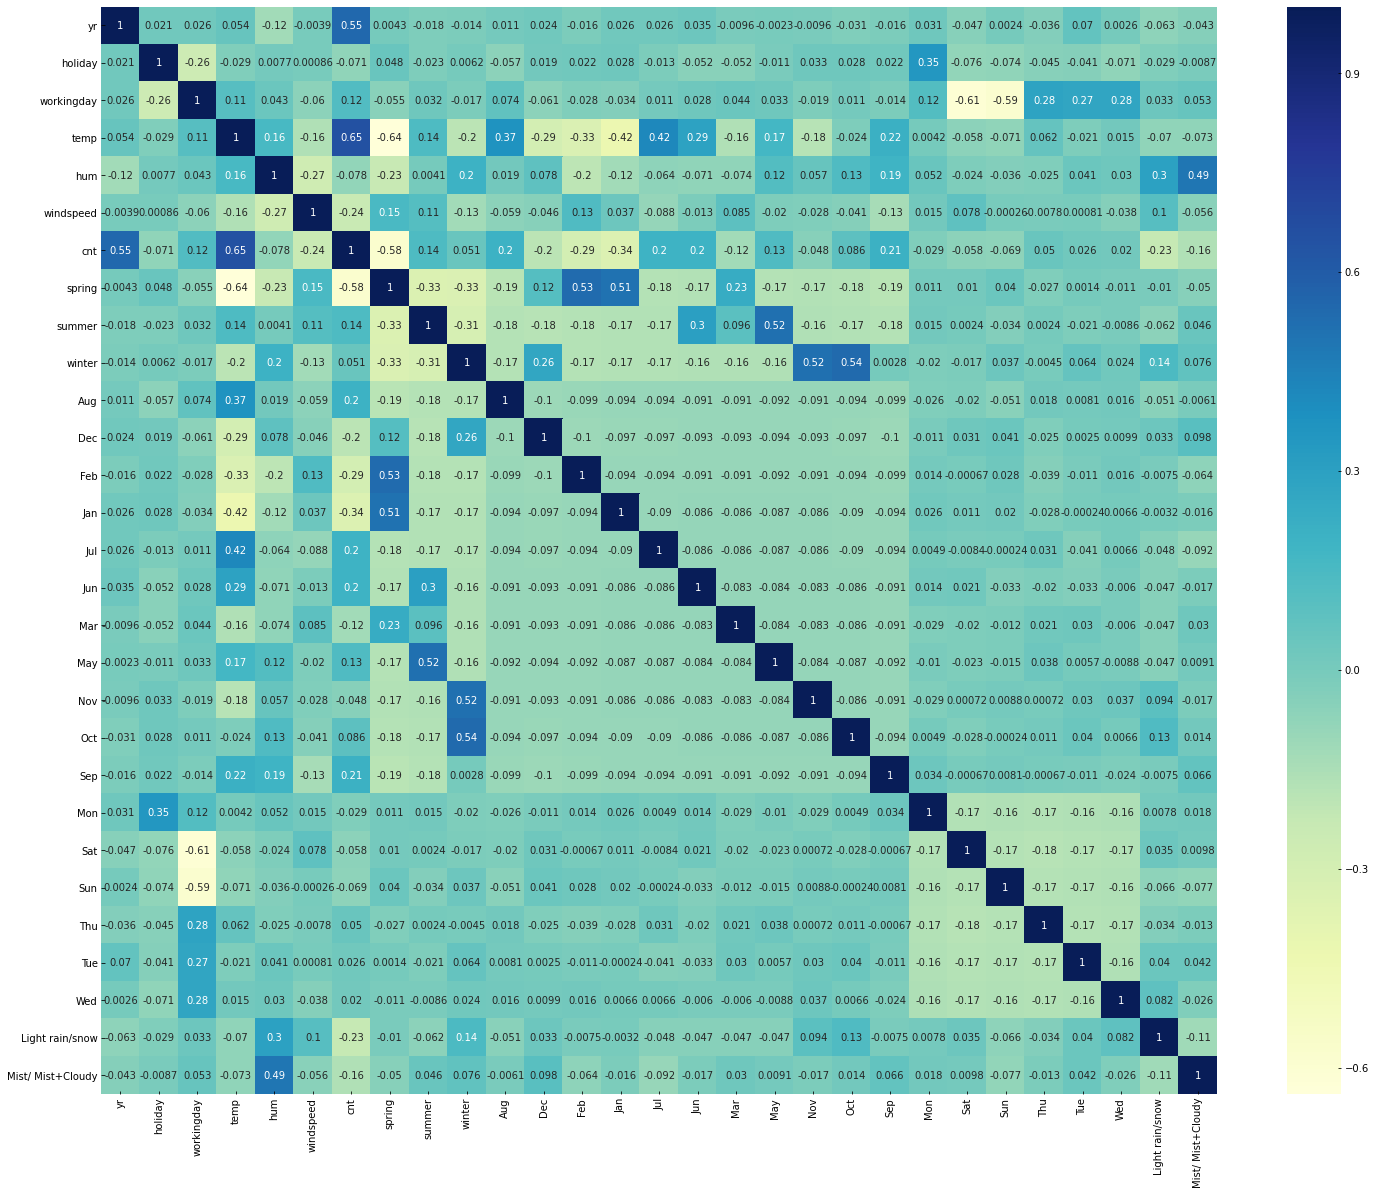

In [36]:
#plotting correlation of the training dataframe

corr1 = bikes_train.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corr1, cmap="YlGnBu", annot = True);

We observe target variable has highest correlation with temp.

# 3. Data Modelling

## 3.1 Dividing the training data into X (feature variables) and y (target variable) sets for the model building

In [37]:
y_train = bikes_train.pop("cnt")
X_train = bikes_train

In [38]:
y_train.head()

573    0.766567
267    0.573861
551    0.711574
236    0.404970
370    0.468937
Name: cnt, dtype: float64

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
573,1,0,0,0.868126,0.549219,0.278224,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
267,0,0,0,0.716524,0.848305,0.057698,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
551,1,0,1,0.958464,0.339429,0.255118,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,0,0,1,0.778826,0.753631,0.388482,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
370,1,0,1,0.342709,0.457234,0.299990,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.2 Selecting the top 15 variables using RFE: Recursive feature elimination

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [40]:
#Running RFE for 15 predictor variables
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [41]:
#displaying the features selected and the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', False, 2),
 ('Jun', False, 6),
 ('Mar', False, 11),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light rain/snow', True, 1),
 ('Mist/ Mist+Cloudy', True, 1)]

In [42]:
# Checking the selected variables
cols_selected = X_train.columns[rfe.support_]
cols_selected 

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec', 'Nov', 'Sep', 'Sat', 'Sun', 'Light rain/snow', 'Mist/ Mist+Cloudy'], dtype='object')

## 3.3 Building the model with the selected variables, using statsmodel for the detailed statistics

In [43]:
# Creating the X_train dataframe with the RFE selected variables

X_train_rfe = X_train[cols_selected]

In [44]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 573 to 168
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 510 non-null    int64  
 1   holiday            510 non-null    int64  
 2   workingday         510 non-null    int64  
 3   temp               510 non-null    float64
 4   hum                510 non-null    float64
 5   windspeed          510 non-null    float64
 6   spring             510 non-null    uint8  
 7   winter             510 non-null    uint8  
 8   Dec                510 non-null    uint8  
 9   Nov                510 non-null    uint8  
 10  Sep                510 non-null    uint8  
 11  Sat                510 non-null    uint8  
 12  Sun                510 non-null    uint8  
 13  Light rain/snow    510 non-null    uint8  
 14  Mist/ Mist+Cloudy  510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(9)
memory usage: 32.4 KB


In [45]:
X_train_rfe.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,Dec,Nov,Sep,Sat,Sun,Light rain/snow,Mist/ Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.031373,0.672549,0.539576,0.569490,0.346355,0.258824,0.235294,0.094118,0.076471,0.090196,0.152941,0.143137,0.025490,0.335294
std,0.500476,0.174494,0.469744,0.230720,0.181966,0.158454,0.438419,0.424599,0.292279,0.266010,0.286744,0.360284,0.350557,0.157763,0.472557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339074,0.426638,0.234958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.531173,0.571812,0.329488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.699300,0.430793,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model 1

In [46]:
# Building Model 1 with RFE selected variables

#adding constant for the model as reqd by statsmodel
X_train_rfe = sm.add_constant(X_train_rfe)  

#Running the model
lm = sm.OLS(y_train,X_train_rfe).fit()

#printing the model summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.62e-186
Time:                        22:11:39   Log-Likelihood:                 505.20
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     495   BIC:                            -916.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2818      0.02

The R-squared value obtained is 0.839, and all p values except for variable holiday are < 0.05

#### Model 2

The p-value of the variable "holiday" = 0.346, is higher than the significance level of 0.05 . This variable "holiday" is insignificant in presence of other variables, hence we drop this and update the model.

In [47]:
# Dropping variable "holiday"

X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [48]:
# Building Model 2

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.62e-186
Time:                        22:11:39   Log-Likelihood:                 505.20
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     495   BIC:                            -916.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3004      0.03

We also calculate the Variance Inflation Factor or VIF, which gives an idea about how much the feature variables are correlated with each other.

In [49]:
# Calculate the VIF of the new model 2

vif = pd.DataFrame()
X_train_new = X_train_new.drop(["const"], axis = 1)
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.28
2,temp,14.13
1,workingday,13.78
4,windspeed,5.55
10,Sat,3.81
11,Sun,3.68
5,spring,2.80
6,winter,2.69
13,Mist/ Mist+Cloudy,2.41
0,yr,2.05


#### Model 3

The p-value of the variable "Sun" = 0.084, is higher than the significance level of 0.05 . This variable "Sun" is insignificant in presence of other variables, hence we drop this and update the model.

In [50]:
# Dropping variable "Sun"
X_train_new = X_train_new.drop(['Sun'], axis=1)

In [51]:
# Building Model 3

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.11e-186
Time:                        22:11:40   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     496   BIC:                            -920.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3384      0.03

In [52]:
# Calculate the VIF of the new model 3

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.50
2,temp,12.26
4,windspeed,4.90
1,workingday,4.58
6,winter,2.58
5,spring,2.47
12,Mist/ Mist+Cloudy,2.38
0,yr,2.04
10,Sat,1.79
8,Nov,1.68


#### Model 4

In the last model, all the p-values are below the significance level of 0.05. We drop the "hum" variable which has high VIF, or high multicollinearity, and update the model.

In [53]:
# Dropping variable "hum"

X_train_new = X_train_new.drop(['hum'], axis=1)

In [54]:
# Building Model 4

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.76e-184
Time:                        22:11:40   Log-Likelihood:                 494.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     497   BIC:                            -907.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2710      0.02

In [55]:
# Calculate the VIFs for the new model 4

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.97
3,windspeed,4.90
1,workingday,4.54
5,winter,2.30
0,yr,2.03
4,spring,1.95
9,Sat,1.78
7,Nov,1.66
11,Mist/ Mist+Cloudy,1.55
6,Dec,1.40


#### Model 5

In the last model, all the p-values are below the significance level of 0.05. Next we drop the "windspeed" variable which has a higher VIF, and update the model. (we are not dropping temp as it has high coeffiecient and we have checked earlier it has high correlation with the target variable)

In [56]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)

In [57]:
# Building Model 5

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.31e-179
Time:                        22:11:41   Log-Likelihood:                 480.36
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     498   BIC:                            -885.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2040      0.02

In [58]:
# Calculate the VIFs for the new model 5

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.69
1,workingday,4.43
4,winter,2.28
0,yr,2.02
8,Sat,1.71
6,Nov,1.65
3,spring,1.57
10,Mist/ Mist+Cloudy,1.54
5,Dec,1.40
7,Sep,1.19


#### Model 6

In the last model, all the p-values are below the significance level of 0.05, and VIFs below 5. Next we drop the "Sat" variable which we have previously found has a higher correlation coefficient with the variable "workingday", p value of 0.003 and VIF 1.71, update the model.

In [59]:
# Dropping variable "Sat"

X_train_new = X_train_new.drop(['Sat'], axis=1)

In [60]:
# Building Model 6

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.9
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.69e-178
Time:                        22:11:41   Log-Likelihood:                 475.87
No. Observations:                 510   AIC:                            -929.7
Df Residuals:                     499   BIC:                            -883.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2273      0.02

In [61]:
# Calculate the VIFs for the new model 6

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.50
1,workingday,3.02
4,winter,2.26
0,yr,2.02
6,Nov,1.64
9,Mist/ Mist+Cloudy,1.51
3,spring,1.42
5,Dec,1.39
7,Sep,1.19
8,Light rain/snow,1.07


#### Model 7(final model)


In the last model, all the p-values are below the significance level of 0.05, and VIFs below 5. Next we drop the "Nov" variable which we have previously found to have a higher correlation coefficient with the variable "winter", has p value of 0.001 and VIF 1.64, update the model.

In [62]:
# Dropping variable "Nov"

X_train_new = X_train_new.drop(['Nov'], axis=1)

In [63]:
# Building Model 7 (final model)

#Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)  

#Running the model
lm = sm.OLS(y_train,X_train_lm).fit()

#Printing the model summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.35e-177
Time:                        22:11:41   Log-Likelihood:                 470.32
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     500   BIC:                            -878.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2132      0.02

In [64]:
# Calculate the VIFs for the new model 7

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.49
1,workingday,3.02
0,yr,2.02
4,winter,1.51
8,Mist/ Mist+Cloudy,1.51
3,spring,1.42
5,Dec,1.27
6,Sep,1.17
7,Light rain/snow,1.07


In [65]:
print(lm.params)

const                0.213214
yr                   0.227837
workingday           0.031408
temp                 0.398488
spring              -0.137323
winter               0.056683
Dec                 -0.038672
Sep                  0.067223
Light rain/snow     -0.290889
Mist/ Mist+Cloudy   -0.077010
dtype: float64


**Observation :**   

Now we have the final model, in which all the variables have a p-value which is less than the significance level of 0.05, and a VIF lower than 5 (low multicollinearity).

# 4. Residual Analysis

### Check and validate the various assumptions of Regression by performing residual analysis of error terms:

- Error terms are normally distributed with mean =0.  
- Error terms are independent of one another.  
- Error terms have constant variance.  
- Error terms do not have any visible patterns


## 4.1 Distribution of error terms

In [66]:
#predicted y values

y_train_pred = lm.predict(X_train_lm)

In [67]:
#residual/error term

residual = y_train - y_train_pred

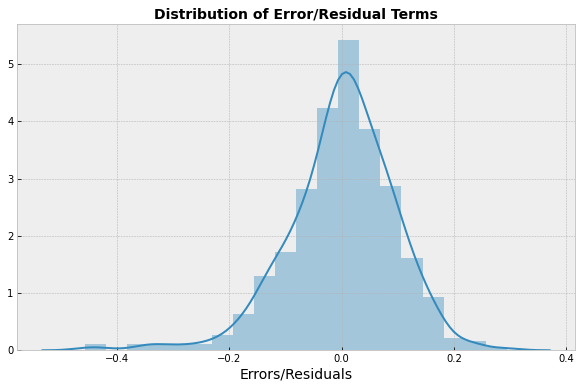

In [68]:
#plotting histogram to observe the distribution of residual/error terms

plt.figure(figsize=(10,6))
sns.distplot(residual, bins = 20)
plt.title('Distribution of Error/Residual Terms',fontsize = 14, fontweight="bold")
plt.xlabel('Errors/Residuals',fontsize = 14)
plt.show()

**Observation:** 

We observe that the error terms have an approximately normal distribution with mean =0, which validates the fundamental assumption of Linear Regression.

## 4.2 Look for patterns in residuals

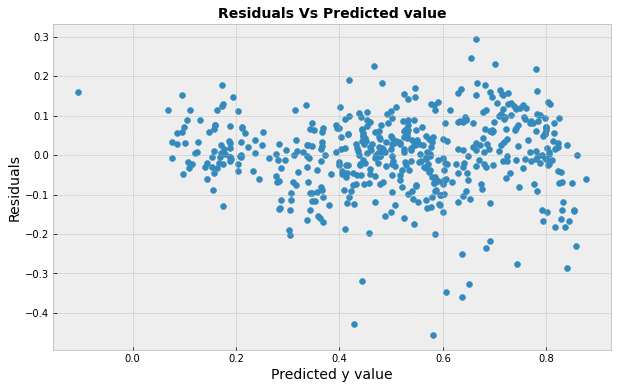

In [69]:
# plot scatterplot to check for any patterns between predicted y value and residuals

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residual)
plt.title('Residuals Vs Predicted value',fontsize = 14, fontweight="bold")
plt.xlabel('Predicted y value',fontsize = 14)
plt.ylabel('Residuals',fontsize = 14)
plt.show;

**Observation:**

Error terms have a constant variance and no patterns can be found, which validates the assumption of Linear Regression.

# 5. Predictions & Model Evaluation

## 5.1 Predictions

#### Applying the scaling on the test sets

In [70]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
670,1,0,1,14.555000,52.2083,17.833725,5847,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
199,0,0,1,31.843347,65.0417,8.750200,4541,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
77,0,0,0,19.372500,37.9167,24.667189,3117,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
225,0,0,0,27.743347,81.7500,14.916411,3820,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
37,0,0,1,11.138347,73.8333,3.042356,1712,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
num_variables = ['temp', 'hum', 'windspeed', 'cnt']
bikes_test[num_variables] = scaler.transform(bikes_test[num_variables])
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
670,1,0,1,0.368668,0.431414,0.502572,0.670156,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
199,0,0,1,0.894086,0.597095,0.223077,0.519903,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
77,0,0,0,0.515079,0.246907,0.712834,0.356075,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
225,0,0,0,0.769481,0.812803,0.412808,0.436954,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
37,0,0,1,0.264831,0.710597,0.047450,0.194432,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light rain/snow,Mist/ Mist+Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490909,0.022727,0.709091,0.553766,0.563568,0.347061,0.527607,0.218182,0.277273,0.263636,0.072727,0.063636,0.045455,0.090909,0.090909,0.095455,0.104545,0.100000,0.095455,0.090909,0.063636,0.159091,0.122727,0.145455,0.118182,0.140909,0.154545,0.036364,0.340909
std,0.501057,0.149373,0.455217,0.222246,0.188369,0.163480,0.218914,0.413953,0.448673,0.441609,0.260281,0.244661,0.208774,0.288135,0.288135,0.294512,0.306665,0.300684,0.294512,0.288135,0.244661,0.366595,0.328872,0.353363,0.323559,0.348721,0.362295,0.187620,0.475096
min,0.000000,0.000000,0.000000,0.046591,-0.242604,0.047441,0.069144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.370226,0.434507,0.224357,0.391797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575824,0.561323,0.316036,0.522204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741444,0.703738,0.441037,0.659888,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.012910,0.808970,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [73]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

Now we use our model to make predictions.

#### Creating X_test_new dataframe by dropping the variables from X_test which were not present in our final model.

In [74]:
# Creating X_test_new dataframe with only the selected variables from final model
X_test_new = X_test[X_train_new.columns]


In [75]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)

## 5.2 Evaluation

#### Checking spread of actual value and predicted value

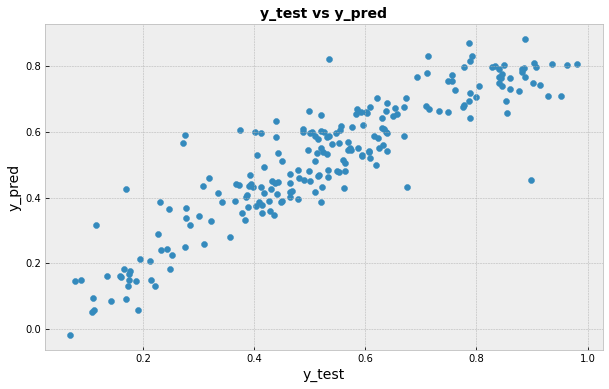

In [77]:
# Plotting scatterplot of y_test and y_pred to understand the spread.

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize = 14, fontweight="bold")  
plt.xlabel('y_test', fontsize=14)                         
plt.ylabel('y_pred', fontsize=14)  
plt.show;

### Calculating R-squared values for train dataset & test dataset

In [78]:
# r2_score for test dataset
r2_score(y_test, y_pred)

0.8082589548806247

In [79]:
# r2_score for train dataset
r2_score(y_train, y_train_pred)

0.8157738157964096

In [80]:
#calculate the r2_score difference of test dataset and train dataset
r2_score(y_train, y_train_pred) - r2_score(y_test, y_pred)

0.0075148609157849044

**Observation:**

The R-Squared values of the train dataset and test dataset are comparable, as the difference between them = 0.007. Hence, our model will be able to predict well in the case of unseen data.

# 6. Final Model Interpretation and Inferences

In [81]:
# Statistics of final model
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.35e-177
Time:                        22:11:45   Log-Likelihood:                 470.32
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     500   BIC:                            -878.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2132      0.02

In [82]:
#Coefficients of final model in order of priority
df = pd.DataFrame(lm.params)
df.columns = ["Coefficient"]
df["Absolute value"] = abs(df["Coefficient"])
df.sort_values(by = "Absolute value", ascending = False)

,Coefficient,Absolute value
temp,0.398488,0.398488
Light rain/snow,-0.290889,0.290889
yr,0.227837,0.227837
const,0.213214,0.213214
spring,-0.137323,0.137323
Mist/ Mist+Cloudy,-0.077010,0.077010
Sep,0.067223,0.067223
winter,0.056683,0.056683
Dec,-0.038672,0.038672
workingday,0.031408,0.031408


## 6.1 Inferences:

- The R-squared and Adjusted R-squared values of our final model are 0.816 and 0.812 respectively. Thus approximately 81% of the variation of the dependent variable is explained by the model.


- The R-squared score calculated on the test set is 0.8082. Difference between R-squared values of test and train datasets is 0.0075.


- The F-statistic and Prob (F-statistic) values of our final model are 246.0 (high value) and 2.35e-177 (approximately equal to zero) respectively. Therefore our overall model fit is significant.


- The p-values for all the coefficients in the final model are less than the significance level of 0.05, hence all the predictors are statistically significant.


- The VIF values for all the coefficients in the final model are less than 4, hence all the predictors have low multicollinearity.


## 6.2 Interpretation:

From the above final model, the equation of our best fitted line is as follows:


**$ cnt = 0.3984  \times  temp  -0.2908  \times  Light  rain/snow + 0.2278 \times yr -0.1373\times spring -0.0770 \times Mist/ Mist+Cloudy + 0.0672 \times Sep + 0.0566 \times winter -0.0386 \times Dec  + 0.0314 \times workingday +  0.2132$**



 Top variables in predicting the demand for shared bikes, along with their coefficients are as follows:
 
 - **temp, 0.3984** : The demand for bikes rises with the increase in temperature. For every unit increase in temperature, the bike hire count increases by 0.3984 units, when all other variables are kept constant.
 
 
 - **Light rain/snow,−0.2908** : This variable has a negative coefficient, hence affects the demand for bikes inversely. For a unit increase in Light rain/snow variable, the bike count is expected to decrease by 0.2908 units with respect to "Clear/Partly cloudy" reference variable, keeping all other variables as constant.
 
 
 - **year, 0.2278**: As the year variable increases, there is an increasing demand of bikes.  For every increase of one year, the bike hire count is expected to increase by 0.2278 units , keeping all other variables as constant.
 
 
 - **spring, −0.1373** : For every unit increase in the spring variable, the count is expected to decrease by −0.1373 units, when calculated with respect to Fall season reference variable, keeping all other variables as constant.
 
 
 - **Mist/ Mist+Cloudy, −0.0770** : This variable has a negative coefficient. For every unit increase in  the Mist/ Mist+Cloudy variable, the cnt decreases by −0.0770 units w.r.t. "Clear/Partly cloudy" reference variable, when all other variables are kept constant.
 
 
 - **Sep, 0.0672** : Calculated w.r.t. the month of April as reference, the cnt increases by 0.0672 units for every unit increase in  the September month variable, when all other variables are kept constant.
 
 
 - **winter, 0.0566**: For every unit increase in the winter variable, the count is expected to increase by 0.0566 units, when calculated with respect to Fall season as refernce, keeping all other variables as constant.
 
 
 - **Dec, −0.0386** : This variable has a negative coefficient. Calculated w.r.t. the month of April as reference, the cnt decreases by −0.0386 units for every unit increase in the December month variable, when all other variables are kept constant.
 
 
 - **workingday, 0.0314**: For every unit increase in the workingday variable, the count is expected to increase by 0.0314 units, keeping all other variables as constant.
 
 
 - **const, 0.2132** : Assuming all other predictor variables =0, then the cnt = 0.2132.

